# #Tasks


#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    
    


- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [40]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [41]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

#### Explore Data

You can rename columns to more usable, if you need.

In [42]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [43]:
df.head()

CustomerID  Gender  Age  Annual_Income  Spending_Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40

In [44]:
df.shape

(200, 5)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [46]:
df.describe().T

count    mean        std   min    25%    50%     75%    max
CustomerID      200.0  100.50  57.879185   1.0  50.75  100.5  150.25  200.0
Age             200.0   38.85  13.969007  18.0  28.75   36.0   49.00   70.0
Annual_Income   200.0   60.56  26.264721  15.0  41.50   61.5   78.00  137.0
Spending_Score  200.0   50.20  25.823522   1.0  34.75   50.0   73.00   99.0

In [47]:
df.drop(columns= "CustomerID", inplace=True)

In [48]:
df.head()

Gender  Age  Annual_Income  Spending_Score
0    Male   19             15              39
1    Male   21             15              81
2  Female   20             16               6
3  Female   23             16              77
4  Female   31             17              40

In [49]:
df.nunique()

Gender             2
Age               51
Annual_Income     64
Spending_Score    84
dtype: int64

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [50]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.histplot(x='Age', data=df, kde =True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

plt.subplot(1,2,2)
ax = sns.histplot(x ='Annual_Income', data=df, color='red', kde = True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

(-1.25, 1.25, -1.25, 1.25)

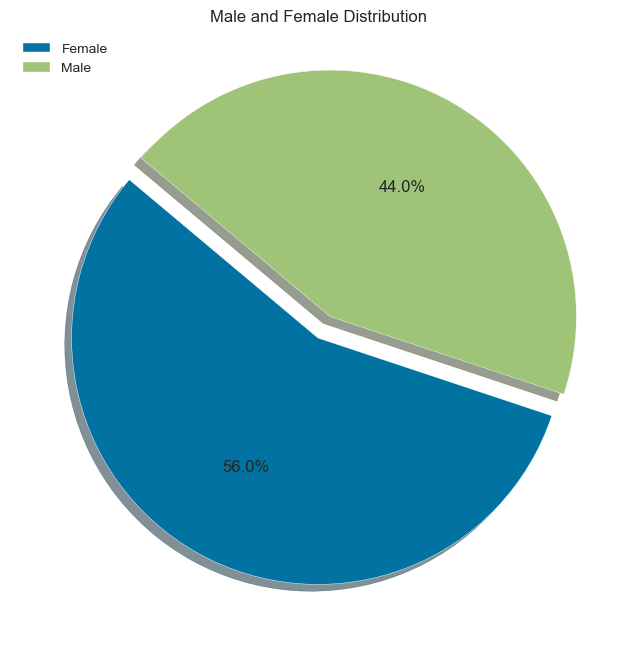

In [51]:
plt.figure(figsize=(8,8))

explode = [0, 0.1]
plt.pie(df['Gender'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

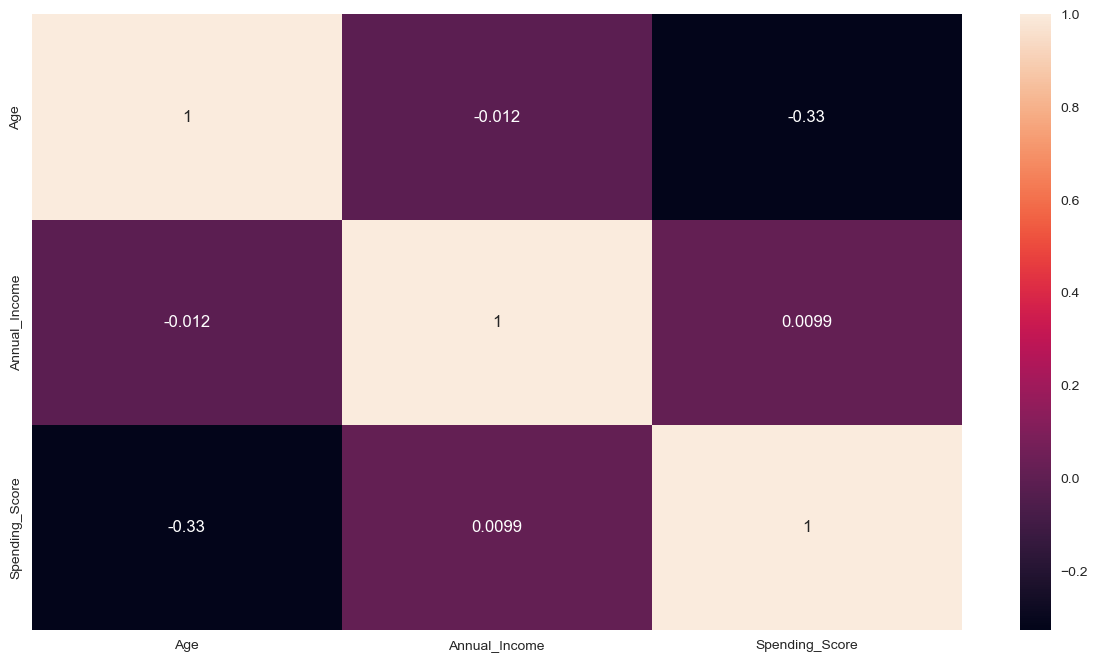

In [52]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

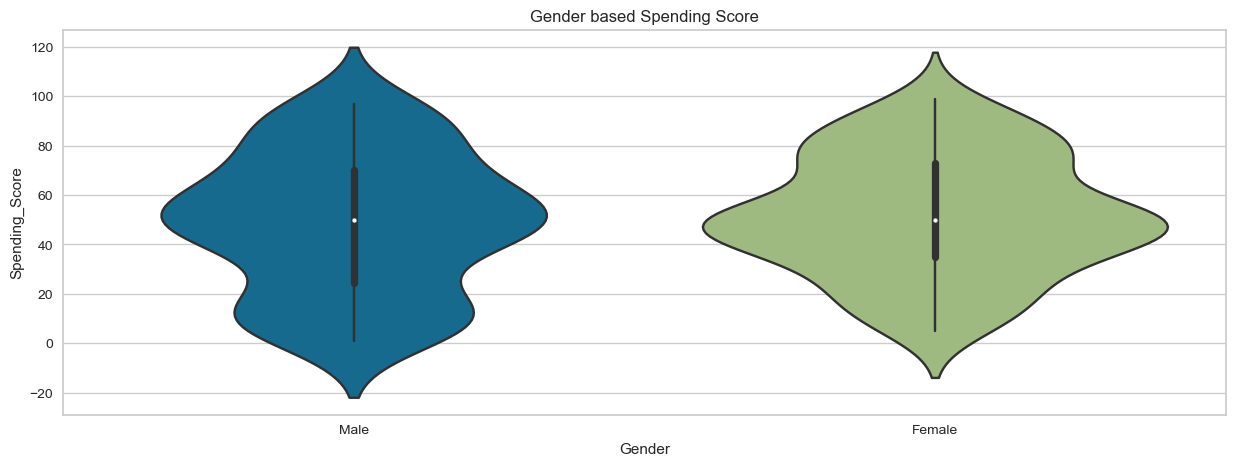

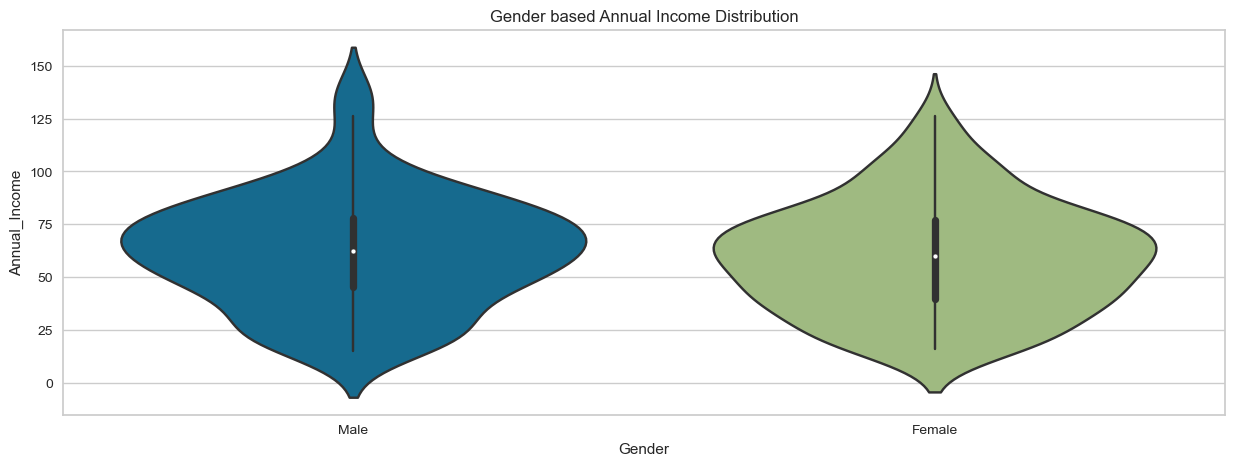

In [53]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender based Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.violinplot(x='Gender',y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

In [54]:
sns.pairplot(df)

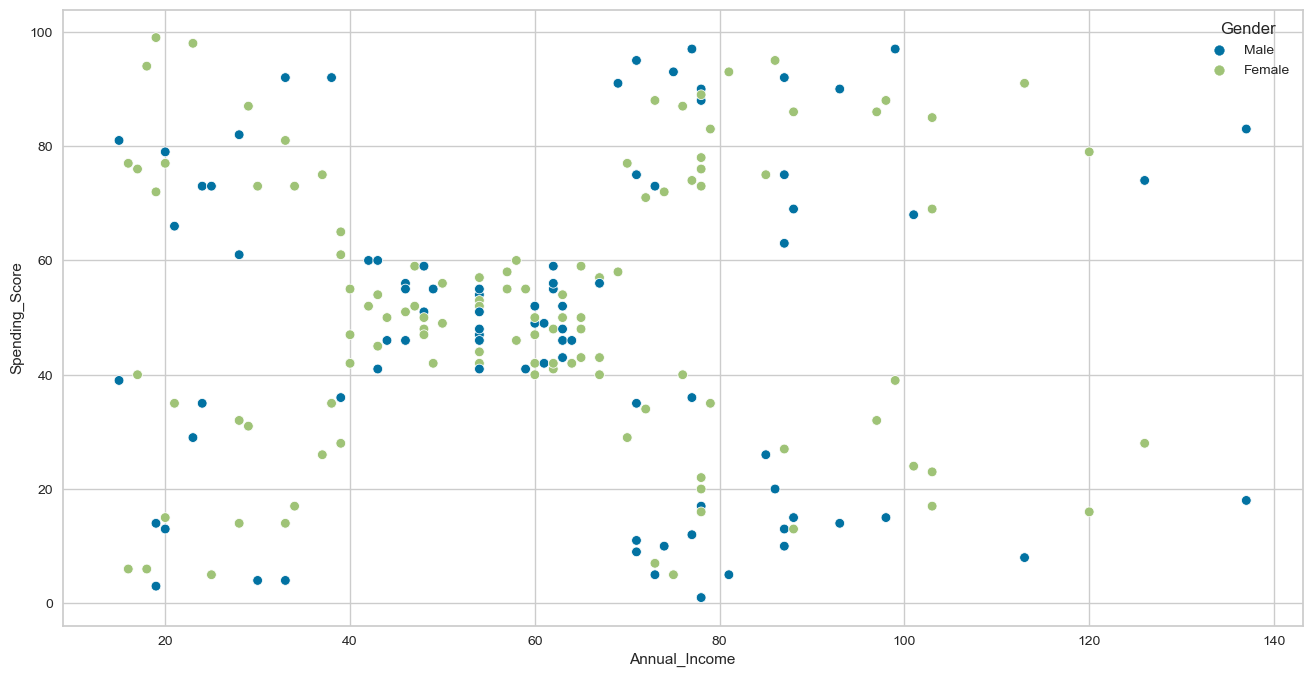

In [55]:
plt.figure(figsize=(16,8))

sns.scatterplot(x ='Annual_Income', y='Spending_Score', data=df, hue = "Gender")
plt.show()

---
---

## 3. Cluster Analysis

# Clustering based on Age and Spending Score - X1

#### *i. Create a new dataset with two variables of your choice*

In [56]:
df_2 = df.drop(columns="Gender") 


In [57]:
X1 = df_2.loc[:,['Age','Spending_Score']]
X1

Age  Spending_Score
0     19              39
1     21              81
2     20               6
3     23              77
4     31              40
..   ...             ...
195   35              79
196   45              28
197   32              74
198   32              18
199   30              83

[200 rows x 2 columns]

#### *ii. Determine optimal number of clusters*

In [58]:
from sklearn.cluster import KMeans

ssd =[] 
for n in range(2,11):
    kmeans=KMeans(n_clusters=n, init = 'k-means++', n_init='auto', max_iter = 300, random_state=42)
    kmeans.fit(X1)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()
#k-means++:Initialisierungsmethode, die,eine bessere Anfangspositionierung der Zentroide basierend auf inertia,  zu erreichen
#n_init:Häufigkeit, mit der der k-means-Algorithmus mit unterschiedlichen Centroids ausgeführt wird
#max_iter:max iterations von k-means für einzelne ausführung

In [59]:
ssd

[75949.15601023017,
 45844.53681626928,
 28165.58356662934,
 23838.248821646186,
 19483.1179104427,
 15591.080836300793,
 13119.834898142792,
 11900.201534430478,
 10936.571642618685]

In [60]:
pd.Series(ssd).diff()

0             NaN
1   -30104.619194
2   -17678.953250
3    -4327.334745
4    -4355.130911
5    -3892.037074
6    -2471.245938
7    -1219.633364
8     -963.629892
dtype: float64

In [61]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1           NaN
2  30104.619194
3  17678.953250
4   4327.334745
5   4355.130911
6   3892.037074
7   2471.245938
8   1219.633364
9    963.629892

In [62]:
ax = df_diff.plot(kind='bar', figsize=(10,6))
ax.bar_label(ax.containers[0]);

In [63]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [64]:
 from sklearn.cluster import KMeans

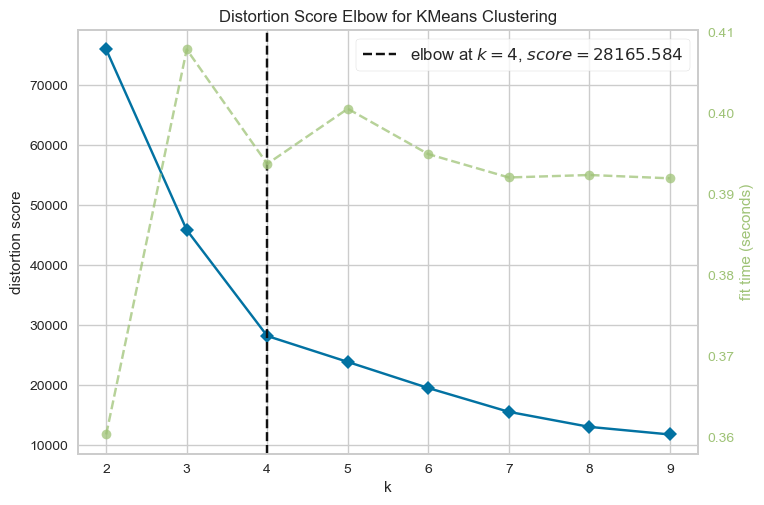

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X1)
visu.poof()

In [66]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,init = 'k-means++', n_init=10, max_iter = 10, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


In [67]:
#model3.n_clusters

for i in range(model3.n_clusters):
    label = (model3.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

NameError: name 'model3' is not defined

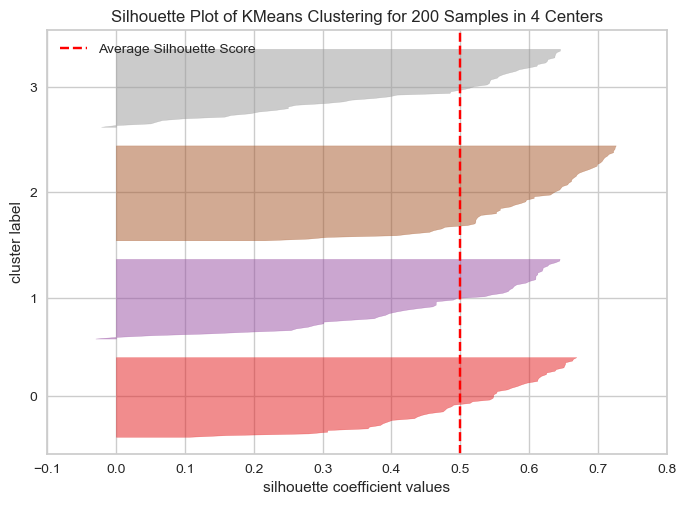

In [78]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, init = 'k-means++', n_init=10, max_iter = 10, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof();

#### *iii. Apply K Means*

In [79]:
kmeans = KMeans(n_clusters = 4,init = 'k-means++', n_init=10, max_iter = 10, random_state=42)

In [80]:
kmeans.fit_predict(X1)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [81]:
X1["cluster_Kmeans"] = kmeans.fit_predict(X1) #kmeans.labels_

In [82]:
X1

Age  Spending_Score  cluster_Kmeans
0     19              39               3
1     21              81               2
2     20               6               1
3     23              77               2
4     31              40               3
..   ...             ...             ...
195   35              79               2
196   45              28               1
197   32              74               2
198   32              18               1
199   30              83               2

[200 rows x 3 columns]

#### *iv. Visualizing and Labeling All the Clusters*

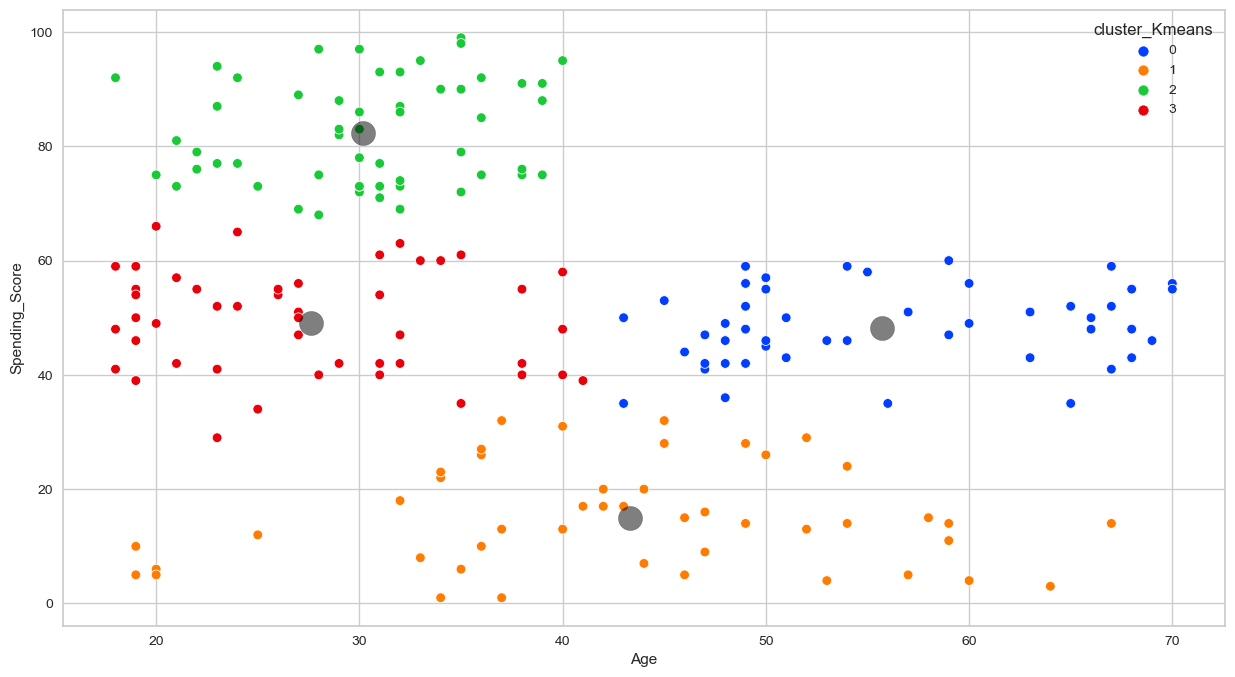

In [83]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Kmeans', data=X1, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

In [84]:
# Vor allem der orange Cluster scheint eine weite Verbreitung zu haben. Es gibt Einschlüsse
# In Bezug auf Alter und Ausgabenbewertung. Im Allgemeinen konzentriert sich meine Produktivität auf das Alter zwischen 20 und 40 Jahren.
# Wir sehen, dass es diejenigen mit hohen (grün), mittleren (rot) und niedrigen (orange) Ausgaben zwischen 20 und 40 gibt.
# Ich frage mich, ob wir die mit den mittleren Ausgaben nach oben ziehen können und die mit den niedrigsten Ausgaben in die Mitte usw.

# Interpretation Age and Spending Score

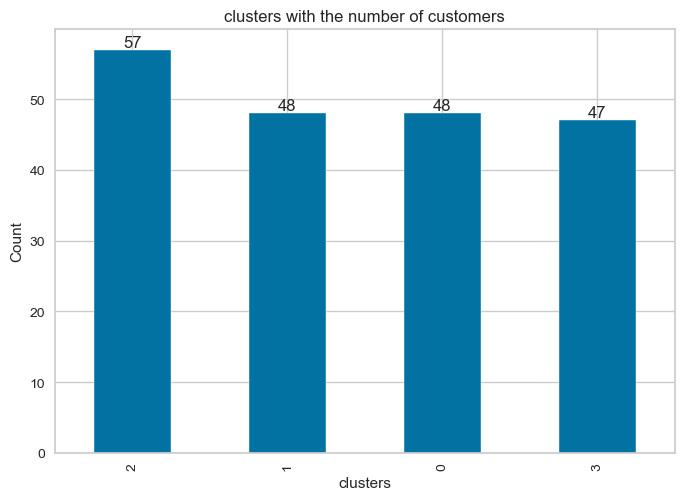

In [85]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X1.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [86]:
df["cluster_Age_Spending_Score"] = X1.cluster_Kmeans
df.head()

Gender  Age  Annual_Income  Spending_Score  cluster_Age_Spending_Score
0    Male   19             15              39                           3
1    Male   21             15              81                           2
2  Female   20             16               6                           1
3  Female   23             16              77                           2
4  Female   31             17              40                           3

In [87]:
df.groupby("cluster_Age_Spending_Score").mean()

Age  Annual_Income  Spending_Score
cluster_Age_Spending_Score                                          
0                           55.708333      54.770833       48.229167
1                           43.291667      66.937500       15.020833
2                           30.175439      66.070175       82.350877
3                           27.617021      53.276596       49.148936

<AxesSubplot:xlabel='cluster_Age_Spending_Score', ylabel='Spending_Score'>

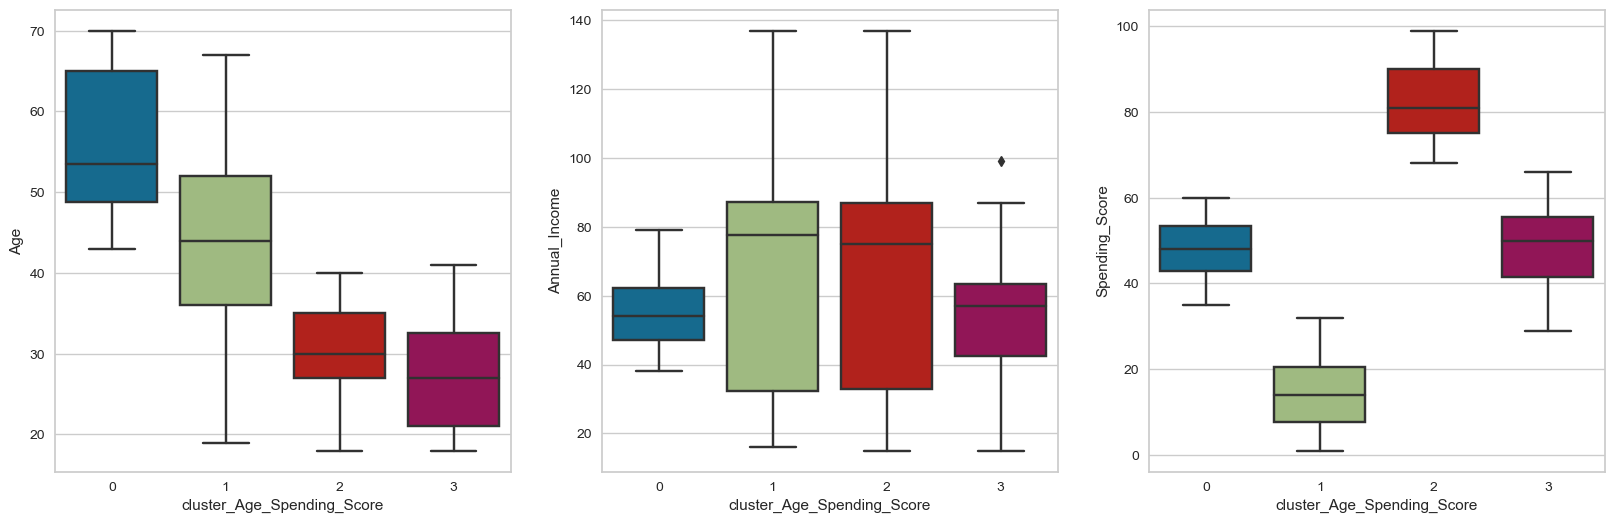

In [88]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Age_Spending_Score", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual_Income", x = "cluster_Age_Spending_Score",  data = df)

plt.subplot(133)
sns.boxplot(y = "Spending_Score", x = "cluster_Age_Spending_Score", data = df)

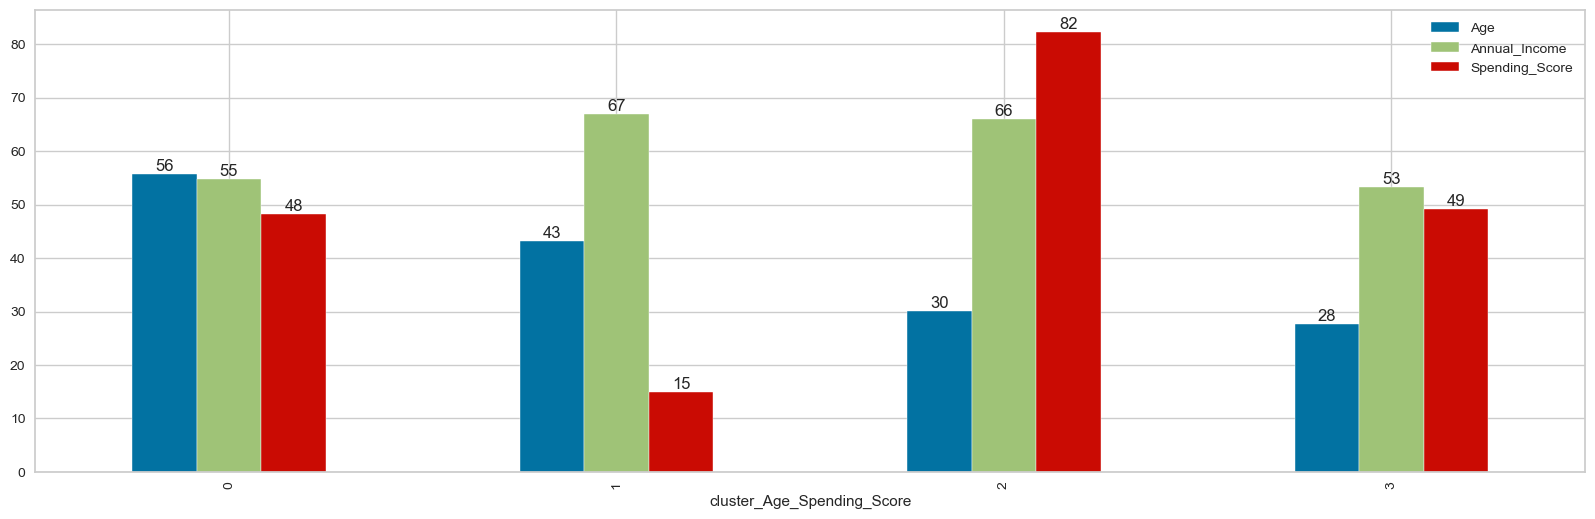

In [89]:
ax = df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

Cluster 0: Das Durchschnittsalter liegt bei etwa 56 Jahren. Sowohl Annula_Income als auch Spending_Scores liegen im Durchschnitt. Es sollte untersucht werden, was getan werden kann, um zu mehr Ausgaben zu führen.

Cluster 1: Das Durchschnittsalter liegt bei etwa 43 Jahren. Das Jahreseinkommen ist hoch, aber die Ausgabenscores sind sehr niedrig. Diese Gruppe ist unsere Zielgruppe und es sollten spezifische Strategien entwickelt werden, um diese Gruppe zum Kauf zu bewegen.

Cluster 2: Das Durchschnittsalter liegt bei etwa 30 Jahren. Das Jahreseinkommen ist hoch und die Ausgabenscores sind sehr hoch. Diese Gruppe besteht aus unseren treuen Kunden. Unser Unternehmen erzielt den größten Gewinn aus dieser Gruppe. Um es nicht zu verpassen, können ganz besondere Aktionen durchgeführt werden.

Cluster 3: Das Durchschnittsalter liegt bei etwa 28 Jahren. Sowohl Annula_Income als auch Spending_Scores liegen im Durchschnitt. Es sollte untersucht werden, was getan werden kann, um zu mehr Ausgaben zu führen.


# Clustering based on Annual Income and Spending Score - X2

#### *i. Create a new dataset with two variables of your choice*

In [90]:
X2 = df[['Annual_Income','Spending_Score']]
X2.head()

Annual_Income  Spending_Score
0             15              39
1             15              81
2             16               6
3             16              77
4             17              40

#### *ii. Determine optimal number of clusters*

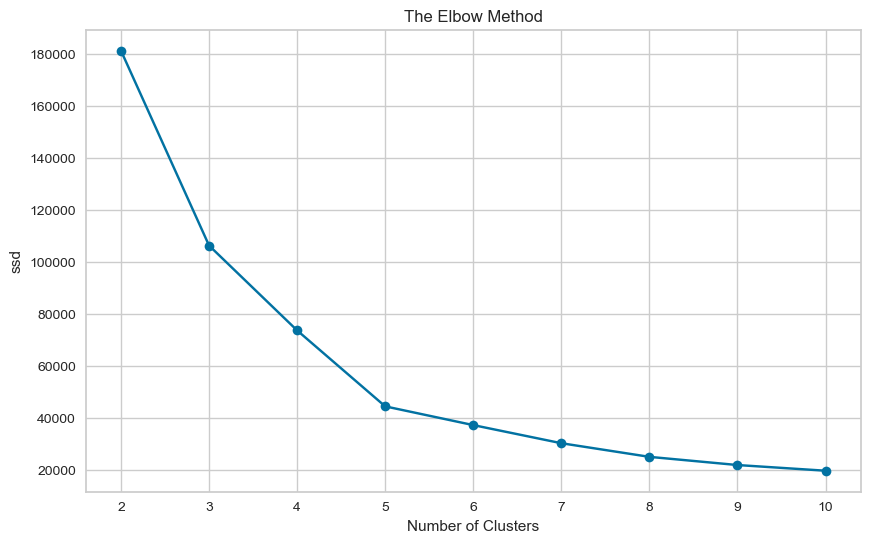

In [91]:
ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,init = 'k-means++', n_init=10, max_iter = 10, random_state=42)
    kmeans.fit(X2)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show()

In [92]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1           NaN
2  75015.222897
3  32668.584023
4  29231.333592
5   7214.640937
6   6974.157303
7   5247.817858
8   3149.746677
9   2190.019823

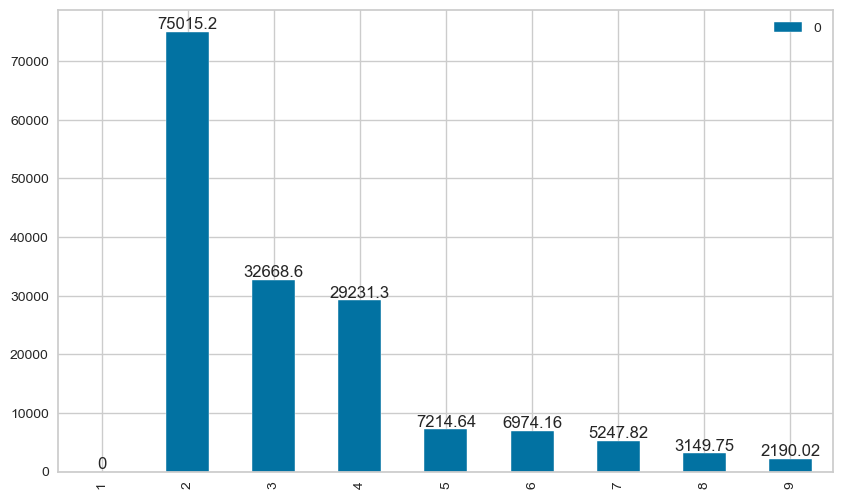

In [93]:
ax = df_diff.plot(kind='bar', figsize=(10,6))
ax.bar_label(ax.containers[0]);

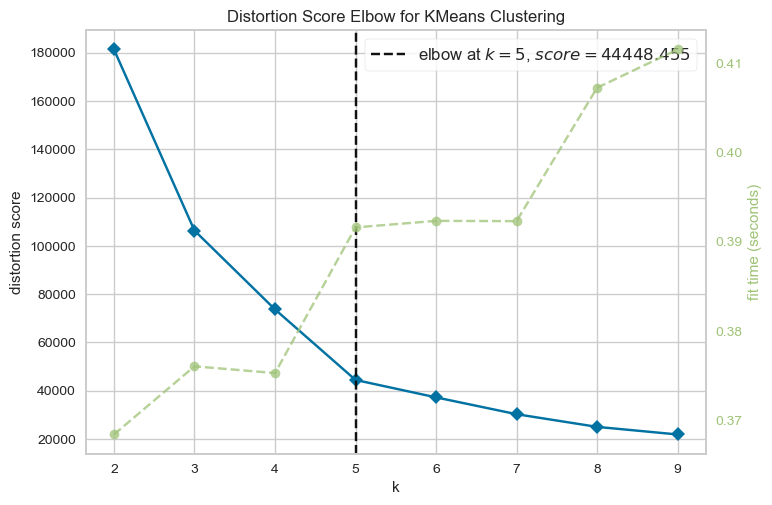

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X2)
visu.poof()

In [95]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, init = 'k-means++', n_init=10, max_iter = 10, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4553729779390266
For n_clusters=10, the silhouette score is 0.45925273534781125


In [96]:
for i in range(model4.n_clusters):
    label = (model4.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")


NameError: name 'model4' is not defined

In [ ]:
model4 = KMeans(n_clusters=5, init = 'k-means++', n_init=10, max_iter = 10, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();
# Silhoutte-Scores innerhalb der Cluster selbst
# im Durchschnitt etwa 0,55
# Die höchste Silhoutte-Bewertung im Cluster liegt im 0-Cluster

# Frage zum Klassenchat: Was sollten wir aus der Breite oder Höhe verschiedener Cluster verstehen?
# Ich meine die Breite, zum Beispiel wurden dem 0-Cluster mehr Zahlen zugewiesen als anderen Clustern, daher ist er breiter und die Werte der Stichproben in der Länge

# Diskret: durchschnittliche Silhoutte-Bewertung für 5 Cluster
# Der dichteste Cluster 0 ist der Cluster. Intensitäten auf der Y-Achse (z. B. Magnitude-Red am größten) Stichproben
# x-Achsen-Silhouette-Scores jeder Stichprobe im Cluster

#### *iii. Apply K Means*

In [97]:
kmeans2 = KMeans(n_clusters=5, init = 'k-means++', n_init=10, max_iter = 10, random_state=42)
kmeans2.fit_predict(X2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [98]:
X2['cluster_Kmeans'] = kmeans2.fit_predict(X2) #kmeans2.labels_
X2

Annual_Income  Spending_Score  cluster_Kmeans
0               15              39               2
1               15              81               3
2               16               6               2
3               16              77               3
4               17              40               2
..             ...             ...             ...
195            120              79               4
196            126              28               1
197            126              74               4
198            137              18               1
199            137              83               4

[200 rows x 3 columns]

# Interpretation based on Annual Income and Spending Score- X2

In [99]:
X2

Annual_Income  Spending_Score  cluster_Kmeans
0               15              39               2
1               15              81               3
2               16               6               2
3               16              77               3
4               17              40               2
..             ...             ...             ...
195            120              79               4
196            126              28               1
197            126              74               4
198            137              18               1
199            137              83               4

[200 rows x 3 columns]

In [100]:
X2.cluster_Kmeans.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: cluster_Kmeans, dtype: int64

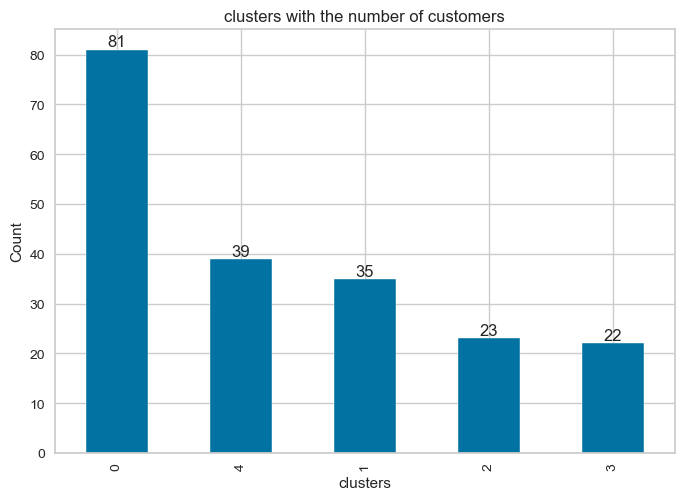

In [101]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X2.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [102]:
df.head()

Gender  Age  Annual_Income  Spending_Score  cluster_Age_Spending_Score
0    Male   19             15              39                           3
1    Male   21             15              81                           2
2  Female   20             16               6                           1
3  Female   23             16              77                           2
4  Female   31             17              40                           3

In [103]:
df.drop(columns= "cluster_Age_Spending_Score", inplace=True)

In [104]:
df["cluster_Annual_Income_Spending_Score"] = X2.cluster_Kmeans
df.head()

Gender  Age  Annual_Income  Spending_Score  \
0    Male   19             15              39   
1    Male   21             15              81   
2  Female   20             16               6   
3  Female   23             16              77   
4  Female   31             17              40   

   cluster_Annual_Income_Spending_Score  
0                                     2  
1                                     3  
2                                     2  
3                                     3  
4                                     2

In [105]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

Age  Annual_Income  \
Gender cluster_Annual_Income_Spending_Score                             
Female 0                                     40.895833      55.354167   
       1                                     43.250000      90.937500   
       2                                     43.214286      27.357143   
       3                                     25.461538      25.692308   
       4                                     32.190476      86.047619   
Male   0                                     45.363636      55.212121   
       1                                     39.315789      85.894737   
       2                                     48.333333      24.666667   
       3                                     25.000000      25.777778   
       4                                     33.277778      87.111111   

                                             Spending_Score  
Gender cluster_Annual_Income_Spending_Score                  
Female 0                                          49.000000  
       1                                          22.062500  
       2                                          21.714286  
       3                                          80.538462  
       4                                          81.666667  
Male   0                                          50.272727  
       1                                          12.947368  
       2                                          19.666667  
       3                                          77.666667  
       4                                          82.666667

<AxesSubplot:xlabel='cluster_Annual_Income_Spending_Score', ylabel='Spending_Score'>

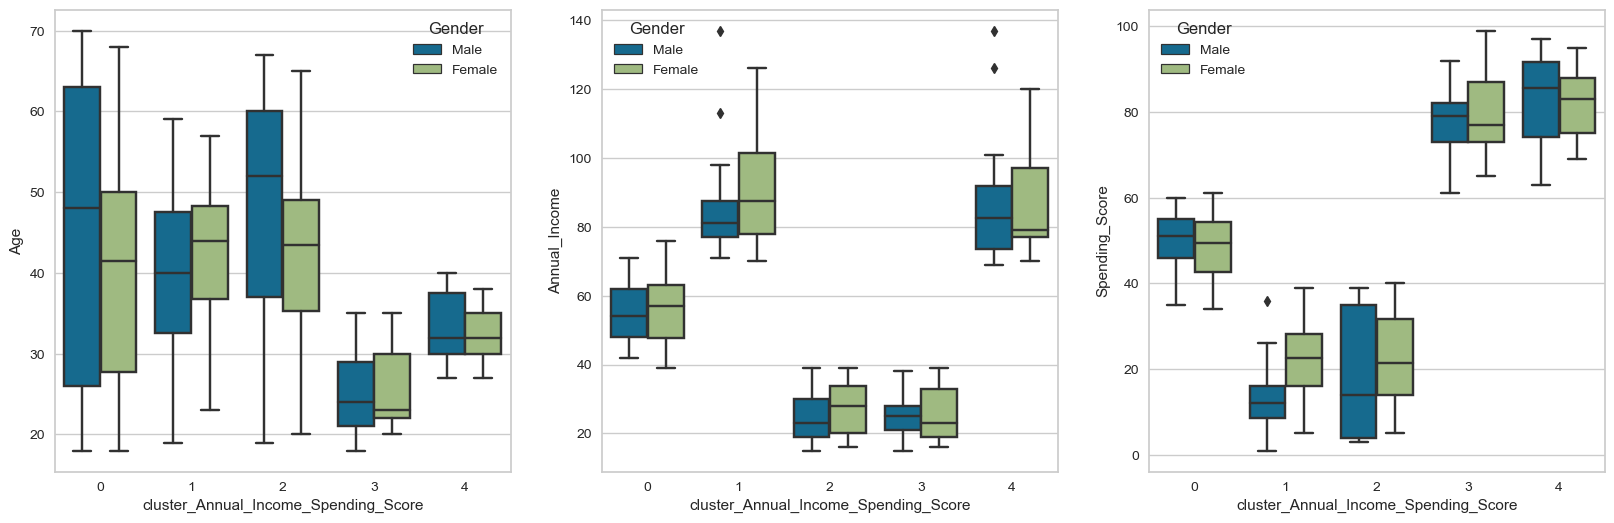

In [106]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual_Income", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(133)
sns.boxplot(y = "Spending_Score", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

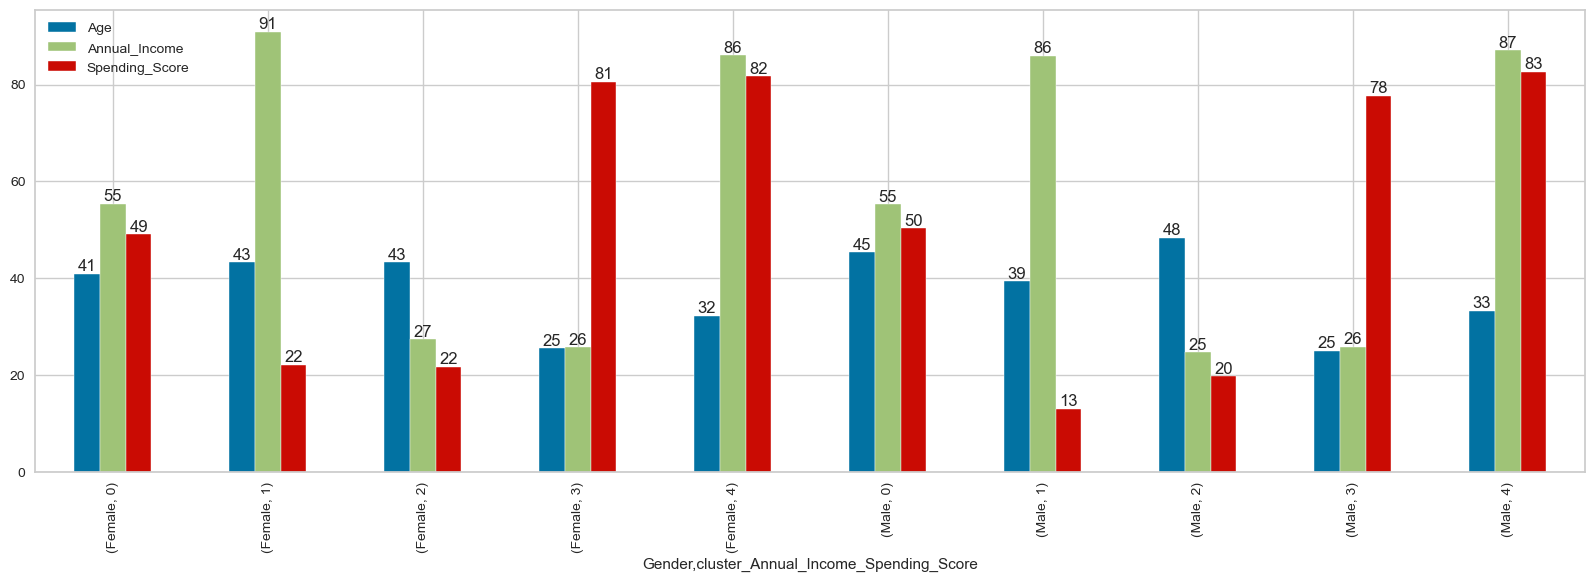

In [107]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar", figsize=(20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

### Weiblich

**Cluster 0**: Das Durchschnittsalter liegt bei etwa 41 Jahren, sowohl Annula_Income als auch Spending_Scores liegen im Durchschnitt.
Es sollte untersucht werden, was getan werden kann, um mehr Ausgaben zu tätigen.

**Cluster 1**: Das Durchschnittsalter liegt bei etwa 43 Jahren, das Jahreseinkommen ist sehr hoch, aber die Ausgabenscores sind niedrig.
Diese Gruppe ist unsere Zielgruppe und für diese Gruppe müssen spezielle Strategien entwickelt werden.

**Cluster 2**: Das Durchschnittsalter liegt bei etwa 43 Jahren. Sowohl der Annula_Income- als auch der Spending_Score sind niedrig. Es kann sein
zum Einkaufen mit Geschenkgutscheinen.

**Cluster 3**: Das Durchschnittsalter liegt bei etwa 25 Jahren. Niedrige Jahreseinkommen, aber sehr hohe Ausgabenwerte. Das
Die Gruppe kauft viel ein, bringt aber nicht viel Gewinn.

**Cluster 4**: Das Durchschnittsalter liegt bei etwa 32 Jahren, das Jahreseinkommen und der Ausgabenwert
ist sehr hoch. Diese Gruppe besteht aus unseren treuen Kunden. Unser Unternehmen erzielt den größten Gewinn aus dieser Gruppe.
Um es nicht zu verpassen, können ganz besondere Aktionen durchgeführt werden.

### Männlich

**Cluster 0**: Das Durchschnittsalter liegt bei etwa 45 Jahren, sowohl Annula_Income als auch Spending_Scores liegen im Durchschnitt.
Es sollte untersucht werden, was getan werden kann, um mehr Ausgaben zu tätigen.

**Cluster 1**: Das Durchschnittsalter liegt bei etwa 39 Jahren, das Jahreseinkommen ist sehr hoch, aber die Ausgabenscores sind sehr niedrig.
Diese Gruppe ist unsere Zielgruppe und für diese Gruppe müssen spezielle Strategien entwickelt werden.

**Cluster 2**: Das Durchschnittsalter liegt bei etwa 48 Jahren. Sowohl der Annula_Income- als auch der Spending_Score sind niedrig. Es kann sein
zum Einkaufen mit Geschenkgutscheinen.

**Cluster 3**: Das Durchschnittsalter liegt bei etwa 25 Jahren. Niedrige Jahreseinkommen, aber sehr hohe Ausgabenwerte. Das
Die Gruppe kauft viel ein, bringt aber nicht viel Gewinn.

**Cluster 4**: Das Durchschnittsalter liegt bei etwa 33 Jahren, das Jahreseinkommen und der Spendingscore
ist sehr hoch. Diese Gruppe besteht aus unseren treuen Kunden. Unser Unternehmen erzielt den größten Gewinn aus dieser Gruppe.
Um es nicht zu verpassen, können ganz besondere Aktionen durchgeführt werden.


In [108]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(X2, x='Annual_Income', y='Spending_Score', color='cluster_Kmeans')
fig.update_traces(marker=dict(size=10))
fig.add_trace(
    go.Scatter(
        x=centers[:, 0],
        y=centers[:, 1],
        mode='markers',
        marker=dict(color='black', size=20, opacity=0.5),
        ##name='Cluster Centers'
    )
)
fig.update_layout(
    title="Clustering Analysis",
    xaxis_title="Annual Income",
    yaxis_title="Spending Score",
    showlegend=True,
)
fig.show()

In [109]:
# Kommentar: Ich kann 5 verschiedene Cluster haben. Besonders im mittleren Cluster sehen wir, dass es eine hohe Konzentration an Frauen gibt.
# Die Gruppe oben rechts: Sie hat ein hohes Jahreseinkommen und hohe Ausgaben. Dies ist die Gruppe, die uns das meiste Einkommen bringt. Das sind unsere treuen Kunden
# .. Das Unternehmen muss diese Gruppe behalten
# Unten rechts. Die jährlichen Einnahmen sind hoch, die Ausgaben jedoch gering. Er sollte versuchen, sie oben rechts einzufügen
# Mittel: Mittel
# Oben links: Jahreseinkommen geringer, mehr ausgeben (Gruppe folgt den Rabatten)
# Unten links: Keine sehr wichtige Gruppe
# Um die Einnahmen des Unternehmens zu steigern, sollte es sich insbesondere auf die obere rechte und untere rechte Gruppe konzentrieren

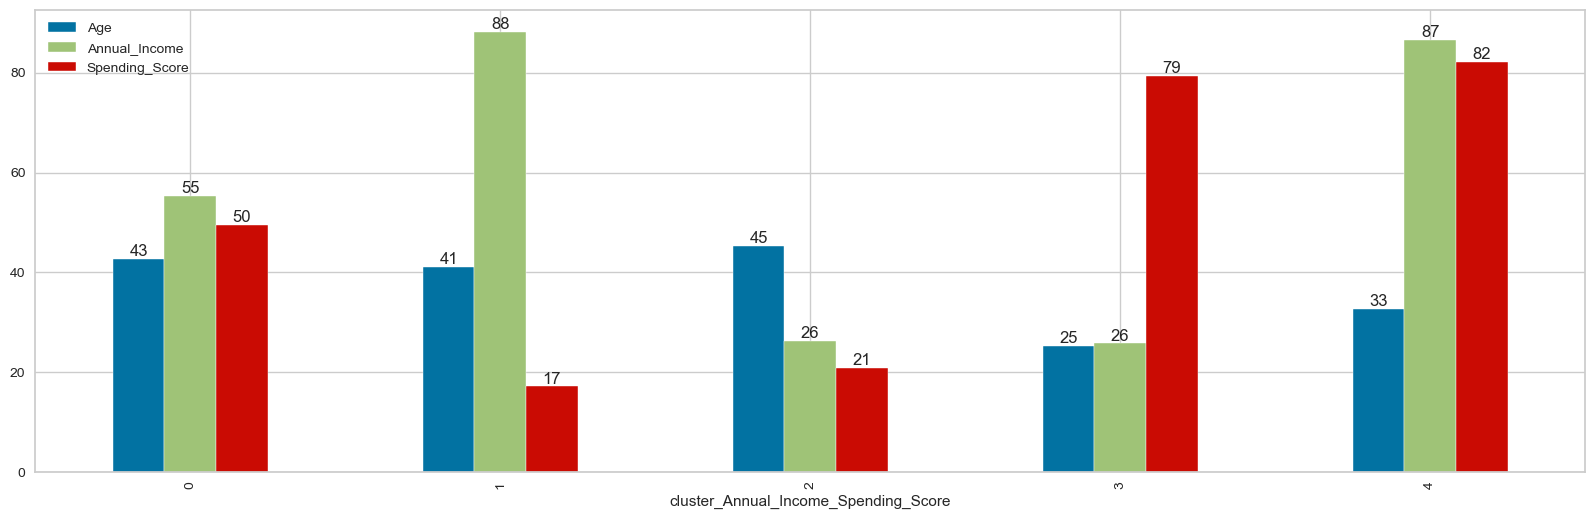

In [110]:
ax = df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**Cluster 0**: Das Durchschnittsalter liegt bei etwa 43 Jahren, sowohl Annula_Income als auch Spending_Scores liegen im Durchschnitt.
Es sollte untersucht werden, was getan werden kann, um mehr Ausgaben zu tätigen.

**Cluster 1**: Das Durchschnittsalter liegt bei etwa 41 Jahren, das Jahreseinkommen ist sehr hoch, aber die Ausgabenscores sind sehr niedrig. Diese Gruppe ist unsere Zielgruppe und für diese Gruppe müssen spezielle Strategien entwickelt werden.

**Cluster 2**: Das Durchschnittsalter liegt bei etwa 45 Jahren. Sowohl der Annula_Income- als auch der Spending_Score sind niedrig. Es kann sein
zum Einkaufen mit Geschenkgutscheinen.

**Cluster 3**: Das Durchschnittsalter liegt bei etwa 25 Jahren. Niedrige Jahreseinkommen, aber sehr hohe Ausgabenwerte. Das
Die Gruppe kauft viel ein, bringt aber nicht viel Gewinn.

**Cluster 4**: Das Durchschnittsalter liegt bei etwa 33 Jahren, das Jahreseinkommen und der Spendingscore sind sehr hoch. Diese Gruppe besteht aus unseren treuen Kunden. Unser Unternehmen erzielt den größten Gewinn aus dieser Gruppe. Um es nicht zu verpassen, können ganz besondere Aktionen durchgeführt werden.